In [1]:
import os
import pandas as pd

import plotly.express as px 
import plotly.graph_objects as go   

import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib

Using matplotlib backend: module://matplotlib_inline.backend_inline


# Import des données brutes

## Fichier des demandes de valeurs foncières diffusé par la DGFiP

### Description

Ce jeu de données est dérivé du jeu de données Demandes de valeurs foncières diffusé par la DGFiP.

Il propose un format alternatif, normalisé et enrichi.

Améliorations par rapport aux fichiers bruts
CSV avec séparateur virgule et encodage UTF-8
Mise à jour avec les données de référence les plus récentes (COG 2020, PCI 2020)
Renommage des colonnes pour un traitement informatique plus facile
Suppression des colonnes non fournies dans la diffusion DVF
Jointure avec les tables fournies en documentation
Normalisation des valeurs décimales (point comme séparateur décimal)
Normalisation des codes postaux (5 caractères)
Normalisation des codes INSEE
Libellés de communes riches (accentués)
Normalisation des codes voie (FANTOIR) (4 caractères)
Création d'un identifiant de parcelle compatible avec les fichiers cadastraux proposés par Etalab
Date de mutation au format ISO-8601
Géocodage latitude/longitude à la parcelle en coordonnées WGS-84
Fourniture des fichiers au département ou à la commune

*   `id_mutation` : Identifiant de mutation (non stable, sert à grouper les lignes)
    
*   `date_mutation` : Date de la mutation au format ISO-8601 (YYYY-MM-DD)
    
*   `numero_disposition` : Numéro de disposition
    
*   `nature_mutation` : Nature de la mutation
    
*   `valeur_fonciere` : Valeur foncière (séparateur décimal = point)
    
*   `adresse_numero` : Numéro de l'adresse
    
*   `adresse_suffixe` : Suffixe du numéro de l'adresse (B, T, Q)
    
*   `adresse_code_voie` : Code FANTOIR de la voie (4 caractères)
    
*   `adresse_nom_voie` : Nom de la voie de l'adresse
    
*   `code_postal` : Code postal (5 caractères)
    
*   `code_commune` : Code commune INSEE (5 caractères)
    
*   `nom_commune` : Nom de la commune (accentué)
    
*   `ancien_code_commune` : Ancien code commune INSEE (si différent lors de la mutation)
    
*   `ancien_nom_commune` : Ancien nom de la commune (si différent lors de la mutation)
    
*   `code_departement` : Code département INSEE (2 ou 3 caractères)
    
*   `id_parcelle` : Identifiant de parcelle (14 caractères)
    
*   `ancien_id_parcelle` : Ancien identifiant de parcelle (si différent lors de la mutation)
    
*   `numero_volume` : Numéro de volume
    
*   `lot_1_numero` : Numéro du lot 1
    
*   `lot_1_surface_carrez` : Surface Carrez du lot 1
    
*   `lot_2_numero` : Numéro du lot 2
    
*   `lot_2_surface_carrez` : Surface Carrez du lot 2
    
*   `lot_3_numero` : Numéro du lot 3
    
*   `lot_3_surface_carrez` : Surface Carrez du lot 3
    
*   `lot_4_numero` : Numéro du lot 4
    
*   `lot_4_surface_carrez` : Surface Carrez du lot 4
    
*   `lot_5_numero` : Numéro du lot 5
    
*   `lot_5_surface_carrez` : Surface Carrez du lot 5
    
*   `nombre_lots` : Nombre de lots
    
*   `code_type_local` : Code de type de local
    
*   `type_local` : Libellé du type de local
    
*   `surface_reelle_bati` : Surface réelle du bâti
    
*   `nombre_pieces_principales` : Nombre de pièces principales
    
*   `code_nature_culture` : Code de nature de culture
    
*   `nature_culture` : Libellé de nature de culture
    
*   `code_nature_culture_speciale` : Code de nature de culture spéciale
    
*   `nature_culture_speciale` : Libellé de nature de culture spéciale
    
*   `surface_terrain` : Surface du terrain
    
*   `longitude` : Longitude du centre de la parcelle concernée (WGS-84)
    
*   `latitude` : Latitude du centre de la parcelle concernée (WGS-84)

In [2]:
folder_path = '../data/raw/DVF'
input_file = os.path.join(folder_path, 'merged_dvf_data.csv')

df_dvf = pd.read_csv(input_file, sep=',', index_col=None, low_memory=False)
df_dvf.head()

,id_mutation,date_mutation,numero_disposition,nature_mutation,valeur_fonciere,adresse_numero,adresse_suffixe,adresse_nom_voie,adresse_code_voie,code_postal,...,type_local,surface_reelle_bati,nombre_pieces_principales,code_nature_culture,nature_culture,code_nature_culture_speciale,nature_culture_speciale,surface_terrain,longitude,latitude
0,2023-1,2023-01-05,1.0,Vente,1070000.0,184.0,NaN,ALL DES HETRES,0124,1630.0,...,Dépendance,NaN,0.0,NaN,NaN,NaN,NaN,NaN,6.019949,46.247458
1,2023-1,2023-01-05,1.0,Vente,1070000.0,159.0,NaN,ALL DES HETRES,0124,1630.0,...,Appartement,233.0,8.0,NaN,NaN,NaN,NaN,NaN,6.020204,46.247228
2,2023-1,2023-01-05,1.0,Vente,1070000.0,159.0,NaN,ALL DES HETRES,0124,1630.0,...,Dépendance,NaN,0.0,NaN,NaN,NaN,NaN,NaN,6.020204,46.247228
3,2023-2,2023-01-03,1.0,Vente,152200.0,2914.0,NaN,RTE DE PONCIN,0107,1450.0,...,Maison,64.0,3.0,S,sols,NaN,NaN,988.0,5.438273,46.129859
4,2023-3,2023-01-05,1.0,Vente,269000.0,427.0,T,CHE DE L'AUBEPIN,0040,1800.0,...,Maison,73.0,3.0,S,sols,NaN,NaN,835.0,5.225844,45.853513


### Valeurs manquantes (NAN)

In [3]:
missing_data_percentage = df_dvf.isna().sum()*100/len(df_dvf)
missing_value_percentage = pd.DataFrame({'column_name': df_dvf.columns,
                                 'percent_missing': missing_data_percentage,'dtypes':df_dvf.dtypes}).sort_values(by='percent_missing', ascending=False)
display(missing_value_percentage)

,column_name,percent_missing,dtypes
ancien_id_parcelle,ancien_id_parcelle,100.000000,float64
ancien_code_commune,ancien_code_commune,99.998341,float64
ancien_nom_commune,ancien_nom_commune,99.998341,object
lot5_surface_carrez,lot5_surface_carrez,99.976519,float64
lot4_surface_carrez,lot4_surface_carrez,99.925606,float64
lot5_numero,lot5_numero,99.782354,object
numero_volume,numero_volume,99.775198,object
lot3_surface_carrez,lot3_surface_carrez,99.677398,float64
lot4_numero,lot4_numero,99.476076,object
lot3_numero,lot3_numero,98.318558,object


### Visualisation des NAN

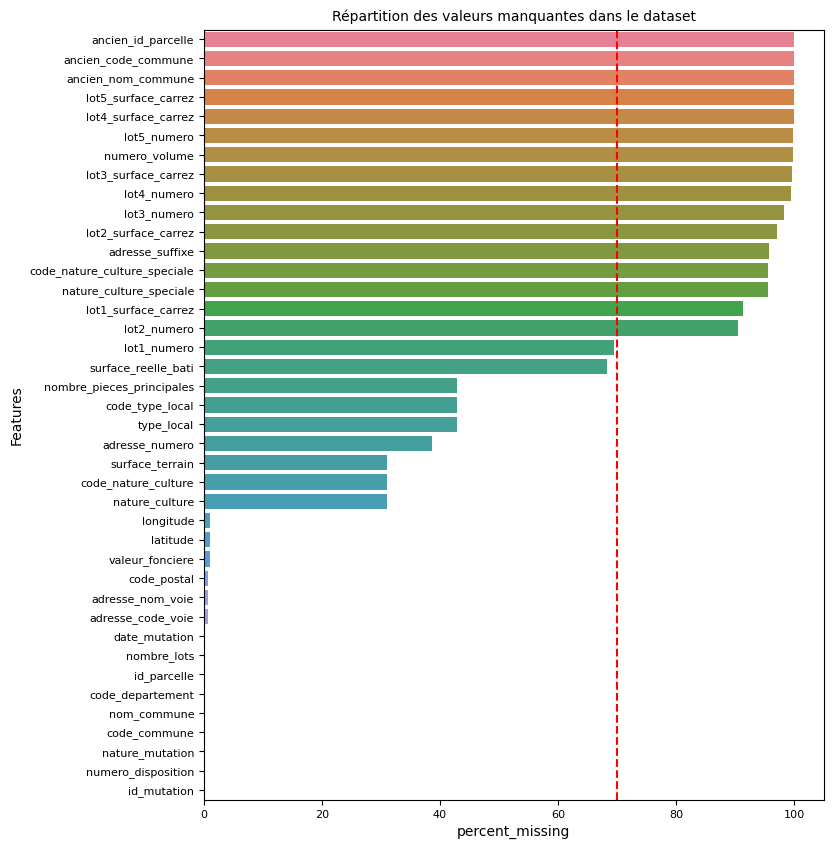

In [4]:
plt.figure(figsize=(8, 10)) 

sns.barplot(y = missing_value_percentage.column_name, 
            x = missing_value_percentage.percent_missing, 
            hue = missing_value_percentage.column_name, 
            order = missing_value_percentage.column_name)

# Add a vertical line at x=50 (adjust as needed)
plt.axvline(x=70, color='red', linestyle='--', label='Threshold (70%)')

plt.title('Répartition des valeurs manquantes dans le dataset', fontsize=10)
plt.xticks(fontsize=8)  
plt.yticks(fontsize=8)  
plt.ylabel('Features');

### Seuil des valeurs manquantes supérieur à 70 %

> Dans notre dataset, on constate une grande diversité des variables. Cette grande diversité nous permet de faire le choix d'éliminer certaines variables qui représentent peu d'enjeux pour la prédiction de notre modèle, par exemple l'ancien code code commune, ou le numéro de volume. 

> Arbitrairement, le seuil de valeurs manquantes que nous choisirons sera de 70 % de valeurs manquantes dans la variable.

In [5]:
missing_values = df_dvf.isnull().mean()
variables_to_keep = missing_values[missing_values <= 0.70].index

print(variables_to_keep)

Index(['id_mutation', 'date_mutation', 'numero_disposition', 'nature_mutation',
       'valeur_fonciere', 'adresse_numero', 'adresse_nom_voie',
       'adresse_code_voie', 'code_postal', 'code_commune', 'nom_commune',
       'code_departement', 'id_parcelle', 'lot1_numero', 'nombre_lots',
       'code_type_local', 'type_local', 'surface_reelle_bati',
       'nombre_pieces_principales', 'code_nature_culture', 'nature_culture',
       'surface_terrain', 'longitude', 'latitude'],
      dtype='object')


### Mise à jour du dataset
> cast des variables catégorielles encodée en float

In [6]:
# Convert the date columns to datetime format
df_dvf["date_mutation"] = pd.to_datetime(df_dvf["date_mutation"], format='%Y-%m-%d')
# Convert the "code_postal" column to "str" format
#Safely convert 'code_postal' to strings
df_dvf["code_postal"] = df_dvf["code_postal"].astype('str').str.replace('.0', '', regex=False)
# Convert the "code_departement" column to "str" format
df_dvf["code_departement"] = df_dvf["code_departement"].astype('str').str.replace('.0', '', regex=False)

# Convert the "adresse_numero" column to "str" format
df_dvf["adresse_numero"] = df_dvf["adresse_numero"].astype(str)

# Convert the "numero_disposition" column to "str" format
df_dvf["numero_disposition"] = df_dvf["numero_disposition"].astype(str)

df_dvf = df_dvf[variables_to_keep]

# Save the cleaned data
folder_path_clean = '../data/processed/DVF'
output_file_clean = os.path.join(folder_path_clean, 'merged_dvf_data_clean.csv')
df_dvf.to_csv(output_file_clean, index=False)

df_dvf.info(show_counts=True)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5366050 entries, 0 to 5366049
Data columns (total 24 columns):
 #   Column                     Non-Null Count    Dtype         
---  ------                     --------------    -----         
 0   id_mutation                5366050 non-null  object        
 1   date_mutation              5366012 non-null  datetime64[ns]
 2   numero_disposition         5366050 non-null  object        
 3   nature_mutation            5366012 non-null  object        
 4   valeur_fonciere            5315005 non-null  float64       
 5   adresse_numero             5366050 non-null  object        
 6   adresse_nom_voie           5332011 non-null  object        
 7   adresse_code_voie          5332402 non-null  object        
 8   code_postal                5366050 non-null  object        
 9   code_commune               5366012 non-null  object        
 10  nom_commune                5366012 non-null  object        
 11  code_departement           5366050 no

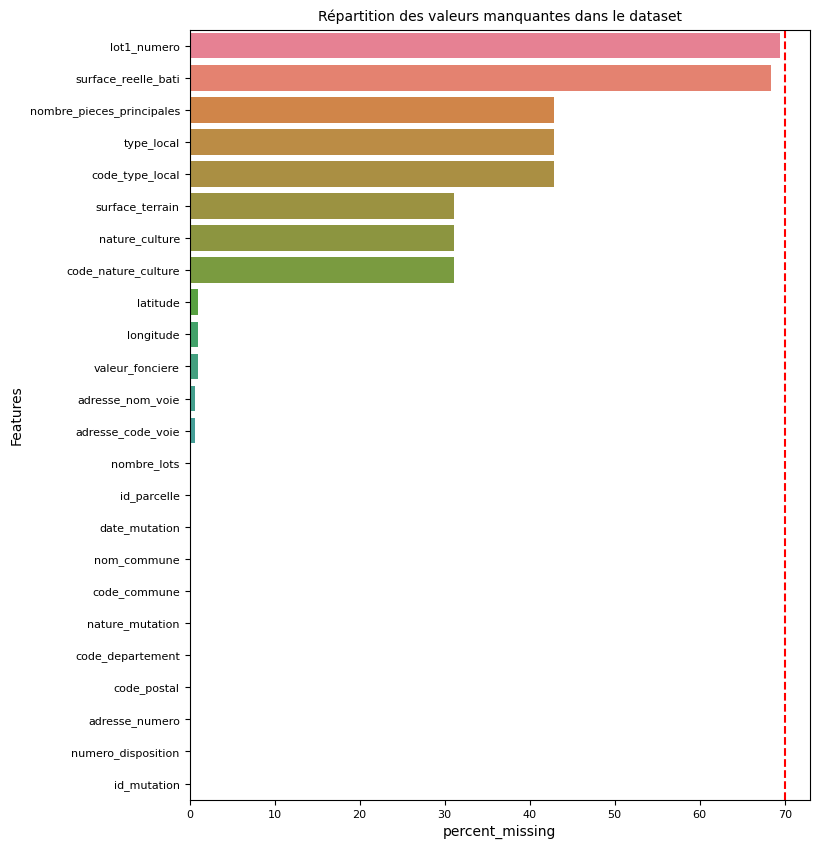

In [7]:
missing_data_percentage = df_dvf.isna().sum()*100/len(df_dvf)
missing_value_percentage = pd.DataFrame({'column_name': df_dvf.columns,
                                         'percent_missing': missing_data_percentage
                                         }).sort_values(by='percent_missing', ascending=False)

plt.figure(figsize=(8, 10)) 

sns.barplot(y = missing_value_percentage.column_name, 
            x = missing_value_percentage.percent_missing, 
            hue = missing_value_percentage.column_name, 
            order = missing_value_percentage.column_name)

# Add a vertical line at x=50 (adjust as needed)
plt.axvline(x=70, color='red', linestyle='--', label='Threshold (70%)')

plt.title('Répartition des valeurs manquantes dans le dataset', fontsize=10)
plt.xticks(fontsize=8)  
plt.yticks(fontsize=8)  
plt.ylabel('Features');

## Dataviz

### Modalités des variables catégorielles ( moins de 10 modalités )

In [8]:
# Combine object and numerical columns
columns_to_check = df_dvf.select_dtypes(include=['object', 'int64', 'float64']).columns

columns_checked = []

# Iterate through each column and filter unique values with less than 10, excluding NaN
for col in columns_to_check:
    unique_values = df_dvf[col].dropna().unique()  # Exclude NaN values
    if len(unique_values) < 10:
        print(f"Column: {col}")
        print(f"Unique Values: {unique_values}")
        print("-" * 50)
        columns_checked.append(col)

Column: nature_mutation
Unique Values: ['Vente' 'Echange' "Vente en l'état futur d'achèvement"
 'Vente terrain à bâtir' 'Adjudication' 'Expropriation']
--------------------------------------------------
Column: code_type_local
Unique Values: [3. 2. 1. 4.]
--------------------------------------------------
Column: type_local
Unique Values: ['Dépendance' 'Appartement' 'Maison'
 'Local industriel. commercial ou assimilé']
--------------------------------------------------


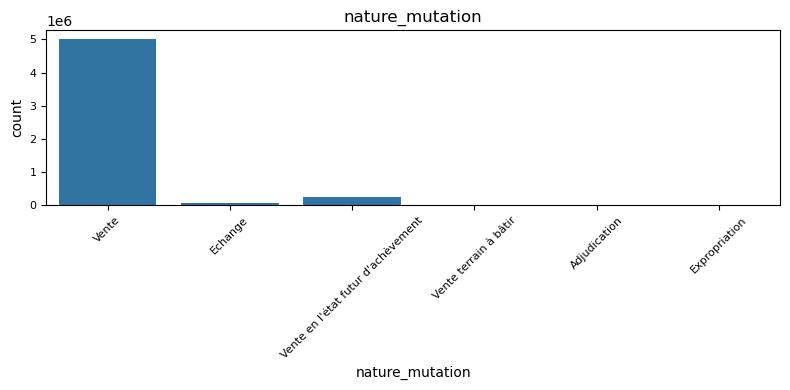

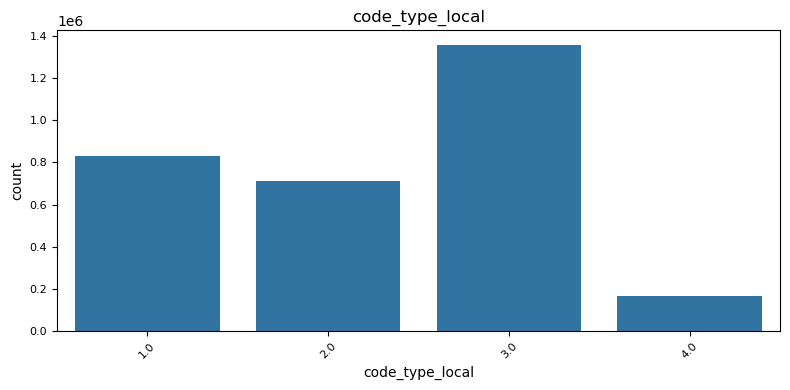

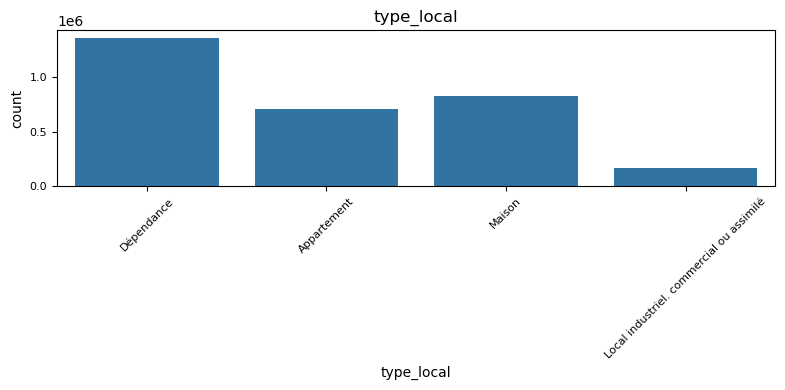

In [9]:
for var_to_viz in columns_checked:
    plt.figure(figsize=(8, 4))
    sns.countplot(data=df_dvf, x=var_to_viz)
    plt.title(f'{var_to_viz}')
    plt.xticks(rotation=45, fontsize=8)
    plt.yticks(fontsize=8)
    plt.tight_layout()
    plt.show()


*   Il semblerait que la variable `code_type_local` décrive la même chose que la variable `type_local`

### Modalités des autres variables ( plus de 10 modalités )

In [10]:
columns_investigated = columns_checked
df_dvf_remaining = df_dvf.drop(columns_investigated,axis=1)

columns_to_check = df_dvf_remaining.select_dtypes(include=['object']).columns

# Iterate through each column and filter unique values with less than 10, excluding NaN
for col in columns_to_check:
    unique_values = df_dvf_remaining[col].dropna().unique()  # Exclude NaN values
    if len(unique_values) > 10:
        print(f"Column: {col}")
        print(f"Unique Values: {unique_values}")
        print("-" * 50)
        columns_checked.append(col)

Column: id_mutation
Unique Values: ['2023-1' '2023-2' '2023-3' ... '2024-556070' '2024-556071' '2024-556072']
--------------------------------------------------
Column: numero_disposition
Unique Values: ['1.0' '2.0' '3.0' '4.0' '5.0' '6.0' '7.0' '8.0' '9.0' '10.0' '11.0'
 '12.0' '13.0' '14.0' '15.0' '16.0' '17.0' '18.0' '19.0' '20.0' '21.0'
 '22.0' '23.0' '24.0' '25.0' '26.0' '27.0' '28.0' '29.0' '30.0' '31.0'
 '32.0' '33.0' '34.0' '35.0' '36.0' '37.0' '38.0' '39.0' '40.0' '41.0'
 '42.0' 'nan' '43.0' '44.0' '45.0' '46.0' '47.0' '48.0' '49.0' '50.0'
 '51.0' '52.0' '53.0' '54.0' '55.0' '56.0' '57.0' '58.0' '59.0' '60.0'
 '61.0' '62.0' '63.0' '64.0' '65.0' '66.0' '67.0' '68.0' '69.0' '70.0'
 '71.0' '72.0' '73.0' '74.0' '75.0' '76.0' '77.0' '78.0' '79.0' '80.0'
 '81.0' '82.0' '83.0' '84.0' '85.0' '86.0' '87.0' '88.0' '89.0' '90.0'
 '91.0' '92.0' '93.0' '94.0' '95.0' '96.0' '97.0' '98.0' '99.0' '100.0'
 '101.0' '102.0' '103.0' '104.0' '105.0' '106.0' '107.0' '108.0' '109.0'
 '110.0' '111.0'

> Un même Id de mutation peut porter sur l'acquision d'un bien comprenant plusieurs lot (maison, terrain, dépendance, etc) .
> Un même Id de mutation peut donc porter sur une même valeur foncière qui qui sera déclinée sur chaque lot compris dans le bien (maison, terrain, dépendance, etc)
>
> Nous les regroupons afin d'éviter les comptages inutiles sur la valeur foncière, et considérons alors un bien dans son ensemble, donc 1 seul enregistremnt / Id de mutation
> Nous obtenons ainsi un bien ('Dépendance', 'Appartement', 'Maison', 'Local industriel. commercial ou assimilé') avec une valeur financière qui inclut les sols / terrains / jardins  
>
> Attention : si l'on retient l'hypothèse d'une variable cible qui serait le prix au m², alors il faudra prendre en considération et détailler tous les éléments qui chiffrent la valeur foncière totale

In [11]:
# Define the list of allowed values for 'code_nature'
code_type_local = [3, 2, 1, 4]

# Filter the DataFrame to keep only rows where 'code_nature' is in the allowed list
df_filtered = df_dvf[df_dvf['code_type_local'].isin(code_type_local)]

# Drop duplicates based on 'id_mutation'
df_unique_filtered = df_filtered.drop_duplicates(subset='id_mutation')

# Display the resulting DataFrame
df_unique_filtered.head()

# folder_path_clean = '../data/processed/DVF'
# output_file_clean = os.path.join(folder_path_clean, 'merged_dvf_data_clean.csv')
# df_unique_filtered.to_csv(output_file_clean, index=False)

,id_mutation,date_mutation,numero_disposition,nature_mutation,valeur_fonciere,adresse_numero,adresse_nom_voie,adresse_code_voie,code_postal,code_commune,...,nombre_lots,code_type_local,type_local,surface_reelle_bati,nombre_pieces_principales,code_nature_culture,nature_culture,surface_terrain,longitude,latitude
0,2023-1,2023-01-05,1.0,Vente,1070000.0,184.0,ALL DES HETRES,0124,1630,01354,...,1.0,3.0,Dépendance,NaN,0.0,NaN,NaN,NaN,6.019949,46.247458
3,2023-2,2023-01-03,1.0,Vente,152200.0,2914.0,RTE DE PONCIN,0107,1450,01404,...,0.0,1.0,Maison,64.0,3.0,S,sols,988.0,5.438273,46.129859
4,2023-3,2023-01-05,1.0,Vente,269000.0,427.0,CHE DE L'AUBEPIN,0040,1800,01361,...,0.0,1.0,Maison,73.0,3.0,S,sols,835.0,5.225844,45.853513
7,2023-4,2023-01-03,1.0,Vente,770000.0,159.0,RUE DU PARC DE VILLARD,0151,1210,01281,...,0.0,1.0,Maison,136.0,7.0,S,sols,921.0,6.083444,46.279993
14,2023-8,2023-01-06,3.0,Vente,85520.0,41.0,CHE DE LA CROIX DE VACAGNOLE,0380,1340,01024,...,0.0,3.0,Dépendance,NaN,0.0,NaN,NaN,NaN,5.171364,46.269235


### Distribution des variables quantitatives

In [12]:
df_dvf_remaining = df_unique_filtered
df_dvf_remaining = df_dvf_remaining.drop(columns_checked,axis=1)
df_dvf_remaining.describe()

,date_mutation,valeur_fonciere,nombre_lots,surface_reelle_bati,nombre_pieces_principales,surface_terrain,longitude,latitude
count,1374458,1.372829e+06,1.374458e+06,902973.000000,1.372564e+06,7.136010e+05,1.366417e+06,1.366417e+06
mean,2023-09-19 19:10:51.393348864,2.643500e+05,6.732050e-01,118.199371,2.094999e+00,8.051817e+02,2.459390e+00,4.610165e+01
min,2023-01-02 00:00:00,1.500000e-01,0.000000e+00,1.000000,0.000000e+00,1.000000e+00,-6.314270e+01,-2.138615e+01
25%,2023-05-11 00:00:00,9.700000e+04,0.000000e+00,51.000000,0.000000e+00,2.250000e+02,6.679420e-01,4.439602e+01
50%,2023-09-11 00:00:00,1.725000e+05,0.000000e+00,78.000000,2.000000e+00,4.760000e+02,2.411662e+00,4.699710e+01
75%,2024-01-29 00:00:00,2.850000e+05,1.000000e+00,105.000000,4.000000e+00,7.830000e+02,4.796792e+00,4.882137e+01
max,2024-06-30 00:00:00,7.620000e+08,2.360000e+02,265000.000000,9.500000e+01,2.960000e+06,5.582527e+01,5.108207e+01
std,NaN,1.327337e+06,1.032059e+00,785.887277,2.101441e+00,4.807174e+03,6.844789e+00,6.227626e+00


In [13]:
for var_to_viz in df_dvf_remaining.columns:
    print(f"Column: {var_to_viz}")

Column: date_mutation
Column: valeur_fonciere
Column: nombre_lots
Column: surface_reelle_bati
Column: nombre_pieces_principales
Column: surface_terrain
Column: longitude
Column: latitude


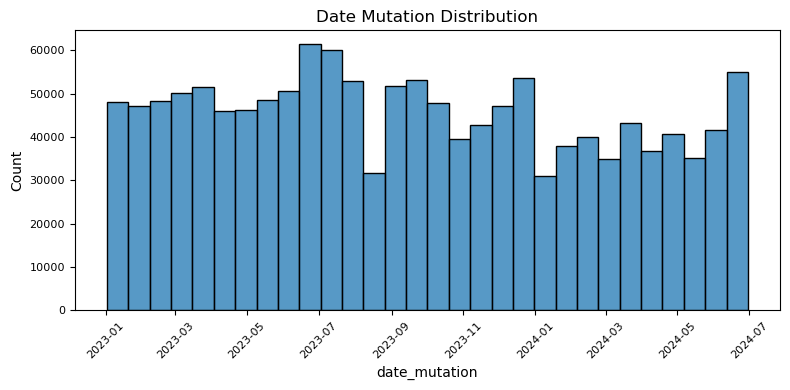

In [14]:
plt.figure(figsize=(8, 4))
sns.histplot(data=df_dvf_remaining, x='date_mutation', bins=30)
plt.title('Date Mutation Distribution')
plt.xticks(rotation=45, fontsize=8)
plt.yticks(fontsize=8)
plt.tight_layout()
plt.show()

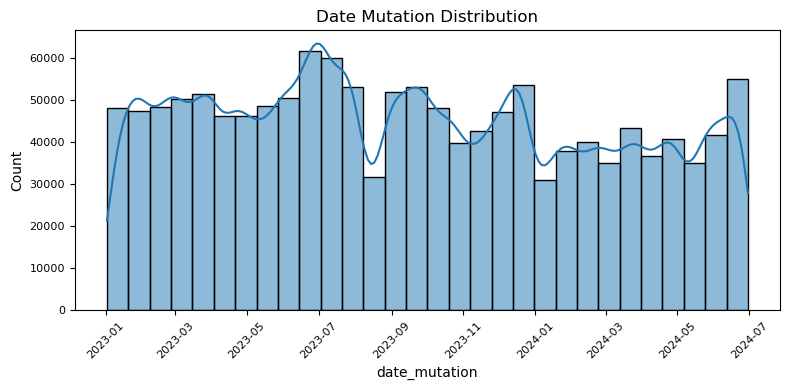

In [15]:
plt.figure(figsize=(8, 4))
sns.histplot(data=df_dvf_remaining, x='date_mutation', bins=30, kde=True)
plt.title('Date Mutation Distribution')
plt.xticks(rotation=45, fontsize=8)
plt.yticks(fontsize=8)
plt.tight_layout()
plt.show()

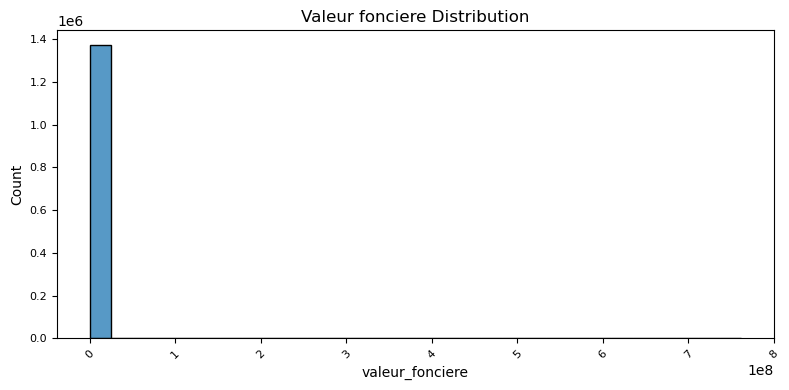

In [16]:
plt.figure(figsize=(8, 4))
sns.histplot(data=df_dvf_remaining, x='valeur_fonciere', bins=30)
plt.title('Valeur fonciere Distribution')
plt.xticks(rotation=45, fontsize=8)
plt.yticks(fontsize=8)
plt.tight_layout()
plt.show()

> Il est problable qu'il y ait eu un problème de collectecte et la présence d'outliners

In [17]:
# Calculate the IQR for 'valeur_fonciere'
Q1 = df_dvf_remaining["valeur_fonciere"].quantile(0.25)  # First quartile (25th percentile)
Q3 = df_dvf_remaining["valeur_fonciere"].quantile(0.75)  # Third quartile (75th percentile)
IQR = Q3 - Q1  # Interquartile range

# Define the lower and upper bounds for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Filter the DataFrame to remove outliers
df_dvf_remaining = df_dvf_remaining[(df_dvf_remaining["valeur_fonciere"] >= lower_bound) & (df_dvf_remaining["valeur_fonciere"] <= upper_bound)]

# # Save the cleaned data
# df_dvf = grouped_df
# folder_path_clean = '../data/processed/DVF'
# output_file_clean = os.path.join(folder_path_clean, 'merged_dvf_data_clean.csv')
# df_dvf.to_csv(output_file_clean, index=False)

df_dvf_remaining.info(show_counts=True)

<class 'pandas.core.frame.DataFrame'>
Index: 1281778 entries, 3 to 5366048
Data columns (total 8 columns):
 #   Column                     Non-Null Count    Dtype         
---  ------                     --------------    -----         
 0   date_mutation              1281778 non-null  datetime64[ns]
 1   valeur_fonciere            1281778 non-null  float64       
 2   nombre_lots                1281778 non-null  float64       
 3   surface_reelle_bati        841779 non-null   float64       
 4   nombre_pieces_principales  1280608 non-null  float64       
 5   surface_terrain            657756 non-null   float64       
 6   longitude                  1274595 non-null  float64       
 7   latitude                   1274595 non-null  float64       
dtypes: datetime64[ns](1), float64(7)
memory usage: 88.0 MB


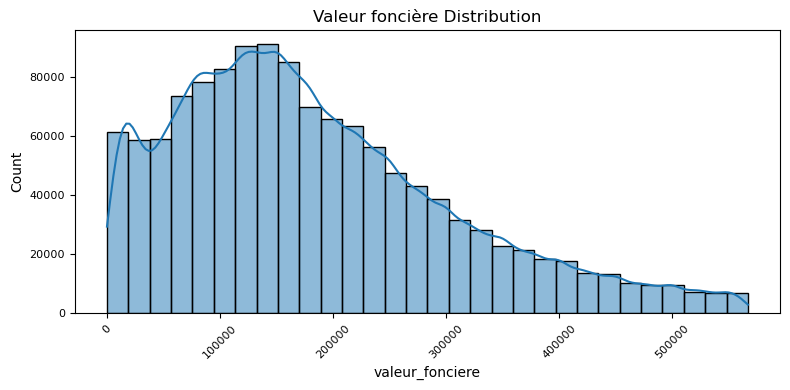

In [18]:
plt.figure(figsize=(8, 4))
sns.histplot(data=df_dvf_remaining, x='valeur_fonciere', bins=30, kde=True)
plt.title('Valeur foncière Distribution')
plt.xticks(rotation=45, fontsize=8)
plt.yticks(fontsize=8)
plt.tight_layout()
plt.show()

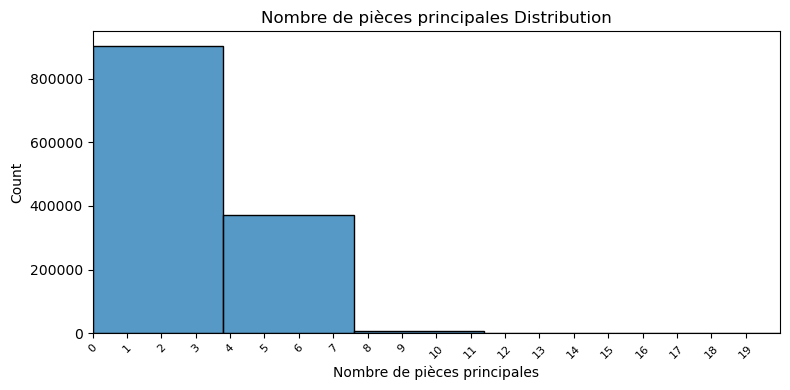

In [19]:
import numpy as np

plt.figure(figsize=(8, 4))
sns.histplot(data=df_dvf_remaining, x='nombre_pieces_principales', bins=25)

# Set x-axis ticks with a specific scale (e.g., every 500,000 units)
tick_positions = np.arange(0, 20, 1)
plt.xticks(tick_positions, rotation=45, fontsize=8)
plt.xlim(0, 20)

# Add title and labels
plt.title('Nombre de pièces principales Distribution', fontsize=12)
plt.xlabel('Nombre de pièces principales', fontsize=10)
plt.ylabel('Count', fontsize=10)

# Show the plot
plt.tight_layout()
plt.show()

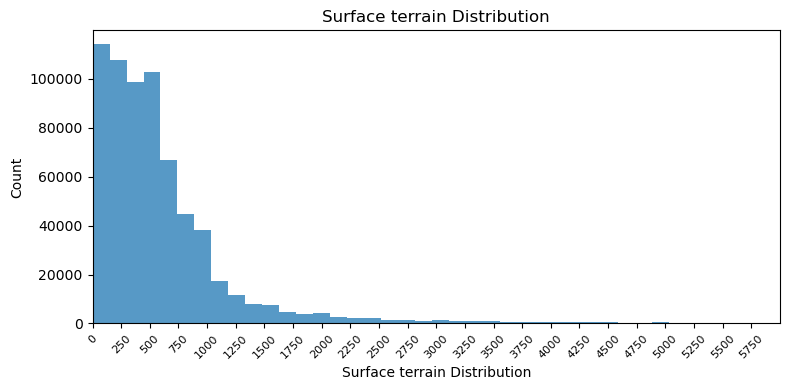

In [20]:
import numpy as np

# Reset index to convert the grouped DataFrame back to a regular DataFrame

plt.figure(figsize=(8, 4))
sns.histplot(data=df_dvf_remaining, x='surface_terrain', bins=20000)

# Set x-axis ticks with a specific scale (e.g., every 500,000 units)
tick_positions = np.arange(0, 6000, 250)
plt.xticks(tick_positions, rotation=45, fontsize=8)
plt.xlim(0, 6000)

# Add title and labels
plt.title('Surface terrain Distribution', fontsize=12)
plt.xlabel('Surface terrain Distribution', fontsize=10)
plt.ylabel('Count', fontsize=10)

# Show the plot
plt.tight_layout()
plt.show()